In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Dataset 

In [92]:
df = pd.read_csv("../data/CreditScoring.csv")

## EDA

In [93]:
df.shape

(4455, 14)

In [94]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [95]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

#### Going through categorical variables and swapping out numbers with description from data dictionary

In [96]:
df['Status'].unique()

array([1, 2, 0])

In [97]:
df['Home'].unique()

array([1, 2, 5, 3, 6, 4, 0])

In [98]:
df['Marital'].unique()

array([2, 3, 1, 4, 5, 0])

In [99]:
df['Records'].unique()

array([1, 2])

In [100]:
df['Job'].unique()

array([3, 1, 2, 0, 4])

In [101]:
df.describe().round()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


We can see that the columns 'income' , 'assests' and 'debt' has some NaN values = 99999999

In [102]:
df.columns = df.columns.map(lambda x: x.lower())

status_map = {
1: "ok",
2: "default",
0: "unknown"
}
df['status'] = df['status'].map(status_map)
home_ownership_map = {
    1: "rent",
    2: "owner",
    3: "priv",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unknown"
}
df['home'] = df['home'].map(home_ownership_map)
marital_status_map = {
    1: "single",
    2: "married",
    3: "widowed",
    4: "separated",
    5: "divorced",
    0: "unknown",
}
df['marital'] = df['marital'].map(marital_status_map)
records_map = {
    1 : "no_records",
    2 : "yes_records"
}
df['records'] = df['records'].map(records_map)
job_status_map = {
    1: "fixed",
    2: "part-time",
    3: "freelance",
    4: "others",
    0: "unknown"
}
df['job'] = df['job'].map(job_status_map)

df['income'] = df['income'].replace(to_replace=99999999, value = np.nan)
df['assets'] = df['assets'].replace(to_replace=99999999, value = np.nan)
df['debt'] = df['debt'].replace(to_replace=99999999, value = np.nan)

In [103]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [104]:
df['status'].value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

Dropping this unknown value

In [109]:
df = df[df['status'] != 'unknown'].reset_index(drop=True)

In [110]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_records,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widowed,no_records,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes_records,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no_records,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no_records,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no_records,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no_records,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no_records,part-time,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no_records,freelance,49,140.0,0.0,0.0,550,550


<Axes: xlabel='income', ylabel='Count'>

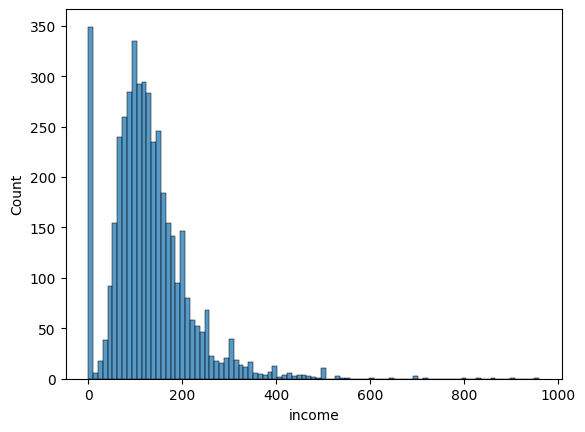

In [112]:
sns.histplot(data=df, x='income')

Will do median imputation of income column because of skewness

<Axes: xlabel='assets', ylabel='Count'>

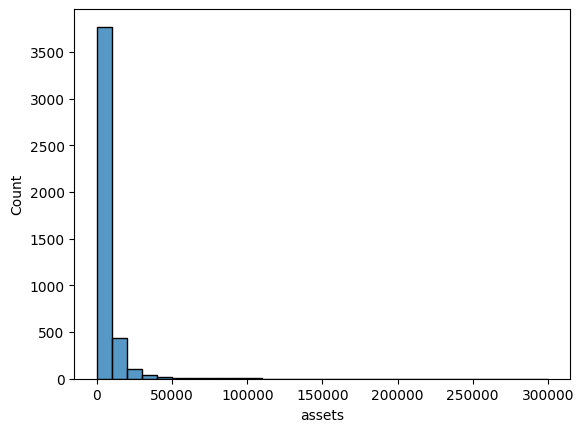

In [113]:
sns.histplot(df['assets'], bins=30)

Will impute the assets column with 0 value

<Axes: xlabel='debt', ylabel='Count'>

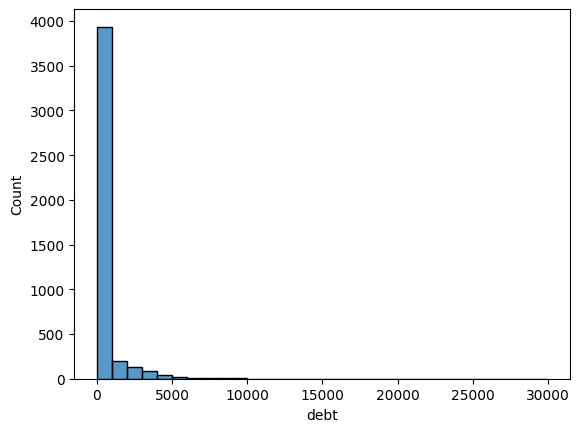

In [114]:
sns.histplot(df['debt'], bins=30)

Will impute with 0 the debt column